<a href="https://colab.research.google.com/github/AMMLRepos/California-Housing-Price-Prediction/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
This google colab notebook is a step-by-step process to approach a Machine learning solution to predict housing prices in California, United States. 

# Business Challenges

- To avoid manual methods of predicting housing prices as they are time taking, costly and many a times not reliable and can be biased on emotional front 
- Estmations are many a times wrong by 20 %

# Expected business outcomes
- To predict the housing prices in California, United States
- To determine whether it is worth investing in a house in a specific area. 

# Questions you should ask as a Machine Learning Engineer 
- What is the end goal and expected outcome ?
- How is the process currently being carried out without Machine Learning ?
- Where is the data located and is it a reliable source ?
- How much data is available ?
- Do we have all required features to get a right prediction ?
- Do we have experts available to help understand the data which is collected ?
- How frequently data gets added, updated and deleted ?

Questions above are a few which can get you started and you might have many more as you move ahead in the process. 

# Things you need to decide before starting 

|Questions|Answers|
|----|-----|
|Is it a supervised learning or a un-supervised learning appraoch ?| Supervised learning as we have data which is labeled |
| Is it a regression task ?| Yes, we need to predict a value(price) and thus it is a regression|
|It it multiple regression problem ?|Yes, since we have many features using which we will predict a value|
|It is univariate ?|Yes, since we only need to predict one value |
|Do you need batch learning or online Learning ?|Here, we don't have a real-time data coming in to be trained. Data collection process in this case is very slow and we can perform batch learning for our model|

#Get the data 
Its time to get your data and have a quick look into it. Also, setup your development environment based on your choice and preferences. In my case, I will be using -

|Activity|Tool/Technology/Library|
|---|---|
|Programming Language | Python 3.x|
|Integrated Development Environment | Google Colab|
|Libraries | Pandas,Numpy, Matplotlib, Seaborn, Sklearn|



# Install your libraries

In [26]:
!pip install pandas numpy matplotlib seaborn sklearn opendatasets --quiet

#Download your data
The dataset we will be working at is available at [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices) and we will be using an opensource library named [opendatasets](https://github.com/JovianML/opendatasets) developed by [jovian](https://jovian.ai) 

Please note that you must provide your Kaggle Username and Key to allow opendatasets to download the files

In [27]:
import opendatasets as od 
import os
dataset_url = "https://www.kaggle.com/camnugent/california-housing-prices"
od.download(dataset_url)

#Set data directory and get the file path. Please note that it may differ in your environment and make required changes to
#paths as given below 
data_dir = "california-housing-prices"
file_name = os.listdir(data_dir)[0]
file_path = data_dir + "/" + file_name 

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


# Import required libraries
Let us now import required libraries to get the data in our working directory and have a look into it

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Also perform some basic settings like - 
- Allow jupyter notebook to show all columns 
- Allow matplotlib to show maps within jupyter notebook 


In [29]:
#Allow jupyter notebook to display all columns 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Allow matplotlib to draw visualizations in the notebook
%matplotlib inline 

#Set seaborn library theme and font size for graphs
sns.set_theme(style = "darkgrid")
sns.set_context("paper")

# Take a quick look at the data

In [30]:
raw_housing_df = pd.read_csv(file_path)
print(raw_housing_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0        -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1        -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2        -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3        -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4        -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY
...          ...       ...                 ...          ...             ...         ...       

In [31]:
print(raw_housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


The above output shows the following - 
- Number of rows and columns - 20640 rows and 10 columns 
- Size of dataset = 1.6 MB
- Number of Non-Null entries - See that we have 20640 records in all columns other than *total_bedrooms* which is *20433* and thus we have missing values in this column
- Data type of columns - All columns other than *ocean_proximity* are float type and hence are numeric. *ocean_proximity* is categorical value as it has a repeated set of values

Let us now see what categories exists in the *ocean_proximity* column and what do they mean

In [32]:
raw_housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We have 5 categories with the counts mentioned above. 
Let us know get the basic statistics on the numerical columns we have in our dataset

In [33]:
raw_housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


describe fuction will provide some basic statistics on the numerical columns of the dataset. Using the above output, we can get some inferences like - 
- Minimum number of rooms is 2 and maximum is 39320 and this is a huge range for the dataset we have 
- Minimum population is 3 and Maximum population is 35682 which is another big range 

Observing other values, we can also that that there is a significant gap in minimum and maximum values of median_house_value, median_income, households, etc. 

Describe function will given you such stats and shows how much of your data has what kind of numberical values 

Let us plot a graph to get another view

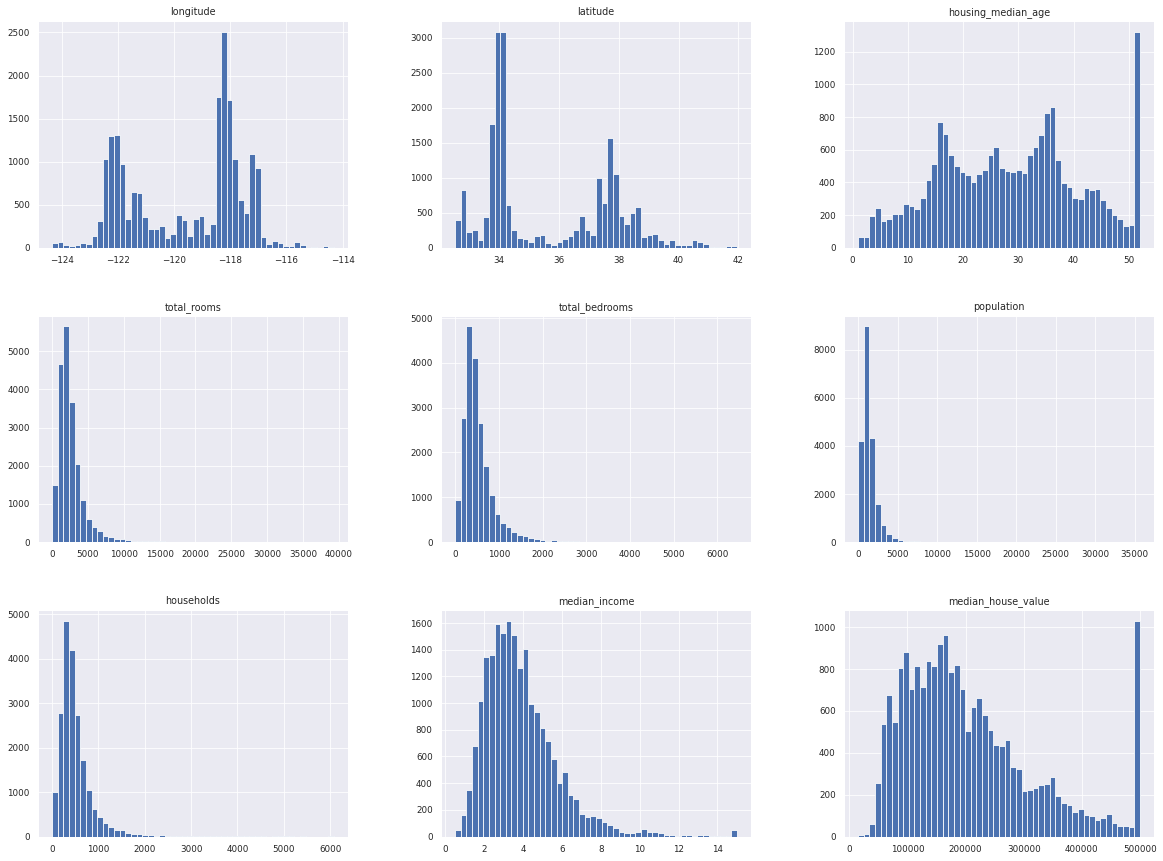

In [34]:
raw_housing_df.hist(bins = 50, figsize=(20,15))
plt.show()